In this tutorial, we cover the `pyphs.PHSSimulation` object for the numerical simulation of `pyphs.PHSCore` objects. The core object from the previous tutorial on [`pyphs.PHSCore`](https://afalaize.github.io/pyphs/posts/phscore/) is used as an example.

<!-- TEASER_END -->

The corresponding Python script `phssimulation.py` can be found in the tutorials at `\pyphs\tutorials\`

In [1]:
# Plot appears in the notebook
%matplotlib inline

In [2]:
# Support for Python 2.x and Python 3.x
from __future__ import division

# import of external packages
import numpy                     # numerical tools
import matplotlib.pyplot as plt  # plot tools

# load the pyphs.PHSNumericalEval class in the current namespace
from pyphs import PHSSimulation

In [3]:
# retrieve the pyphs.PHSCore of a nonlinear RLC from the tutorial on PHSCore
from pyphs.tutorials.phscore import core

In [4]:
# Define the simulation parameters
config = {'fs': 48e3,               # Sample rate (Hz)
          'gradient': 'discret',    # gradient evaluation in {'discret', 'theta', 'trapez'}
          'theta': 0.5,             # theta for evaluation of the structure
          'split': True,            # Split and presolve the explicit equations
          'maxit': 10,              # Max number of iterations for NL solvers
          'numtol': 1e-16,          # Global numerical tolerance
          'path': None,             # Path to saved results. If None, /data/ is created.
          'progressbar': False,     # Display a progress bar
          'timer': False            # Display minimal timing infos
          }

# Instantiate a pyphs.PHSSimulation object associated with a given core PHS
simu = PHSSimulation(core, config=config)

In [5]:
# def simulation time
tmax = 0.02
nmax = int(tmax*simu.nums.fs())
t = [n/simu.nums.fs() for n in range(nmax)]


# def input signal
def sig(t, mode='sin'):
    F = 1000.
    A = 1000.
    if mode == 'sin':
        out = A*numpy.sin(2*numpy.pi*F*t)
    elif mode == 'impact':
        dur = 0.5*1e-3
        start = 0.001
        out = A if start <= t < start + dur else 0.
    elif mode == 'none':
        out = 0.
    return numpy.array([out])


# def generator for sequence of inputs to feed in the PHSSimulation object
def sequ(mode='impact'):
    for tn in t:
        yield sig(tn, mode)

In [6]:
# Initialize the simulation
simu.init(sequ=sequ(), x0=(0., 0.), nt=len(t))

# Proceed
simu.process()

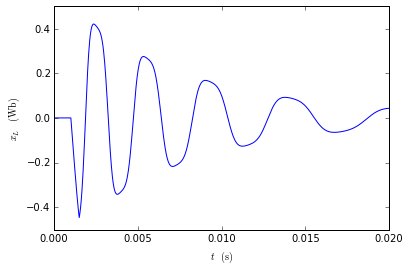

In [7]:
# The simulation results are stored in the simu.data object
t = simu.data.t()       # a generator of time value at each time step
x = simu.data.x()       # a generator of value for vector x at each time step
x1 = simu.data.x(0)     # a generator of value for scalar x component 1

t_list = list(t)
x_list = list(x)
x1_list = list(x1)

plt.figure()
plt.plot(t_list, x1_list)
plt.xlabel('$t \; \mathrm{(s)}$')
plt.ylabel('$x_L \; \mathrm{(Wb)}$')

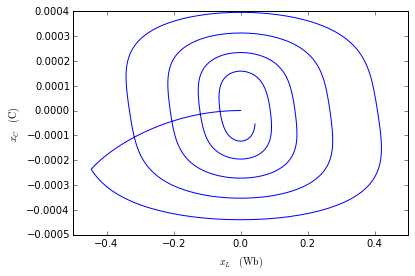

In [8]:
plt.figure()
plt.plot([ex[0] for ex in x_list], [ex[1] for ex in x_list])
plt.xlabel('$x_L\; \mathrm{(Wb)}$')
plt.ylabel('$x_C \; \mathrm{(C)}$')

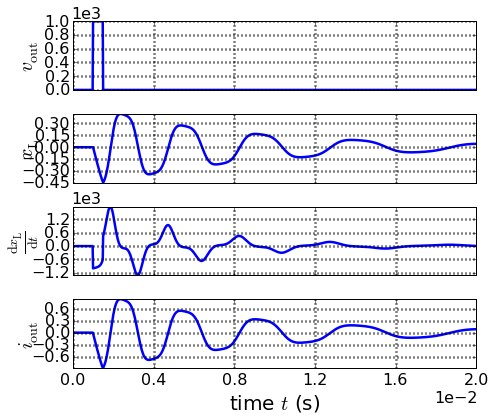

In [9]:
plt.figure()
simu.data.plot([('u', 0), ('x', 0), ('dtx', 0), ('y', 0)])

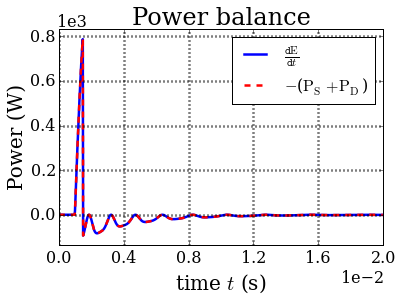

In [10]:
simu.data.plot_powerbal(mode='single')